# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [433]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
pn.extension("plotly")

%matplotlib inline

In [436]:
# Read the Mapbox API key
project_folder = os.path.expanduser('~/Desktop/Fintech/')  # adjust as appropriate thats my directory
load_dotenv(os.path.join(project_folder, '.env'))
mapbox_token = os.getenv("mapbox")

## Load Data

In [437]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.dropna(inplace=True)
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [430]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_average = sfo_data.groupby('year').mean()
housing_units_per_year = sfo_average['housing_units']

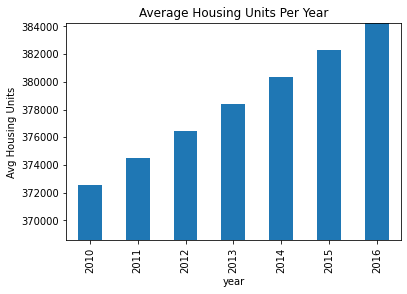

In [429]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
ax = sfo_average.housing_units.plot(kind='bar')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

ax.set_title("Average Housing Units Per Year")
ax.set_ylim(ymin = sfo_average.housing_units.min()-4000,ymax = sfo_average.housing_units.max())
ax.set_ylabel('Avg Housing Units')
plt.show()
plt.close()

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [428]:
# Calculate the average gross rent and average sale price per square foot
sfo_avg_rent_spps = sfo_average

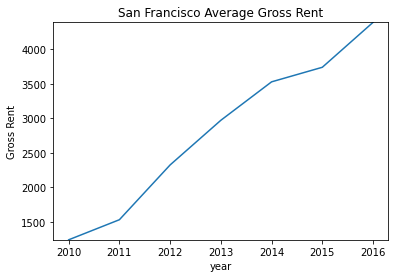

In [427]:
# Plot the Average Gross Rent per Year as a Line Chart 
gross_ax = sfo_avg_rent_spps.gross_rent.plot()
gross_ax.set_title("San Francisco Average Gross Rent")
gross_ax.set_ylim(ymin = sfo_avg_rent_spps.gross_rent.min(),ymax = sfo_avg_rent_spps.gross_rent.max())
gross_ax.set_ylabel('Gross Rent')
plt.show()
plt.close()

### Average Sales Price per Year

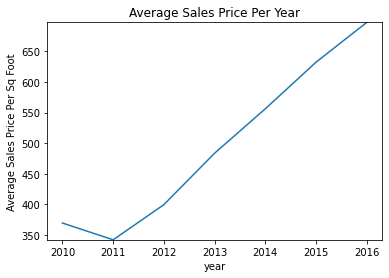

In [399]:
# Plot the Average Sales Price per Year as a line chart
sales_ax = sfo_avg_rent_spps.sale_price_sqr_foot.plot()

plt.title("Average Sales Price Per Year")
plt.ylim((sfo_avg_rent_spps.sale_price_sqr_foot.min(),sfo_avg_rent_spps.sale_price_sqr_foot.max()))

plt.ylabel('Average Sales Price Per Sq Foot')

plt.show()
plt.close()

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [403]:
# Group by year and neighborhood and then create a new dataframe of the mean values
year_neighborhood_df = sfo_data.groupby(['year','neighborhood']).mean().dropna()
year_neighborhood_df.drop_duplicates(inplace=True)
year_neighborhood_df.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [402]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
year_neighborhood_df.sale_price_sqr_foot.hvplot.line(x='year',y='sale_price_sqr_foot',groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [413]:
# Getting the data from the top 10 expensive neighborhoods
sfo_neighborhood_df = sfo_data.groupby(['neighborhood']).mean()
price_by_neighborhood = sfo_neighborhood_df.sort_values('sale_price_sqr_foot',ascending=False)

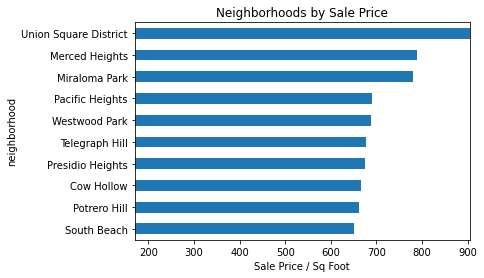

In [415]:
# Plotting the data from the top 10 expensive neighborhoods
ax = price_by_neighborhood.sale_price_sqr_foot.nlargest(10).plot.barh(y=price_by_neighborhood.index)
#Setting up horizontal chart functions
ax.set_title("Neighborhoods by Sale Price")
ax.set_xlim(xmin = price_by_neighborhood.sale_price_sqr_foot.min(),xmax = price_by_neighborhood.sale_price_sqr_foot.max())
ax.set_xlabel('Sale Price / Sq Foot')
ax.invert_yaxis()


## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

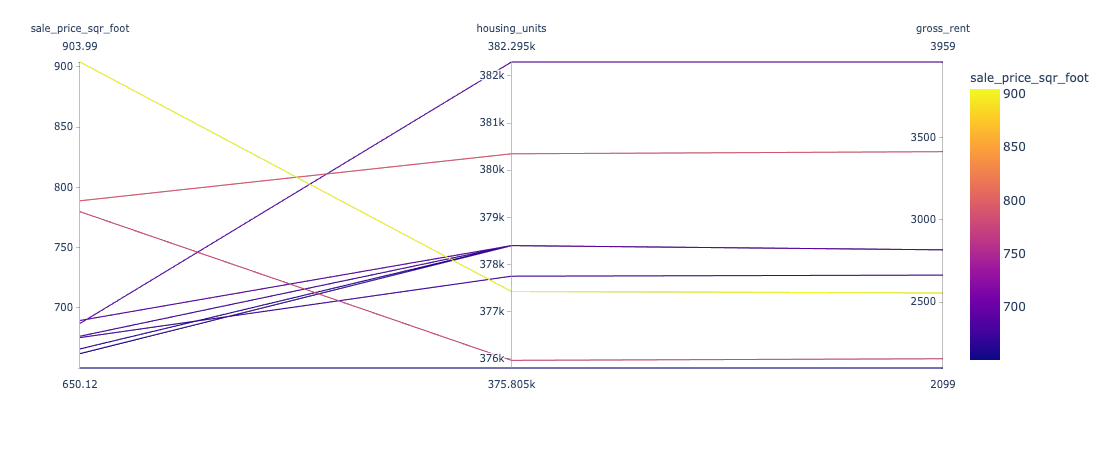

In [416]:
# Parallel Coordinates Plot
price_by_neighborhood.reset_index(inplace=True)
price_by_neighborhood.sort_values(['sale_price_sqr_foot'])
px.parallel_coordinates(price_by_neighborhood.nlargest(10,'sale_price_sqr_foot'),color='sale_price_sqr_foot',dimensions=['sale_price_sqr_foot','housing_units','gross_rent'])


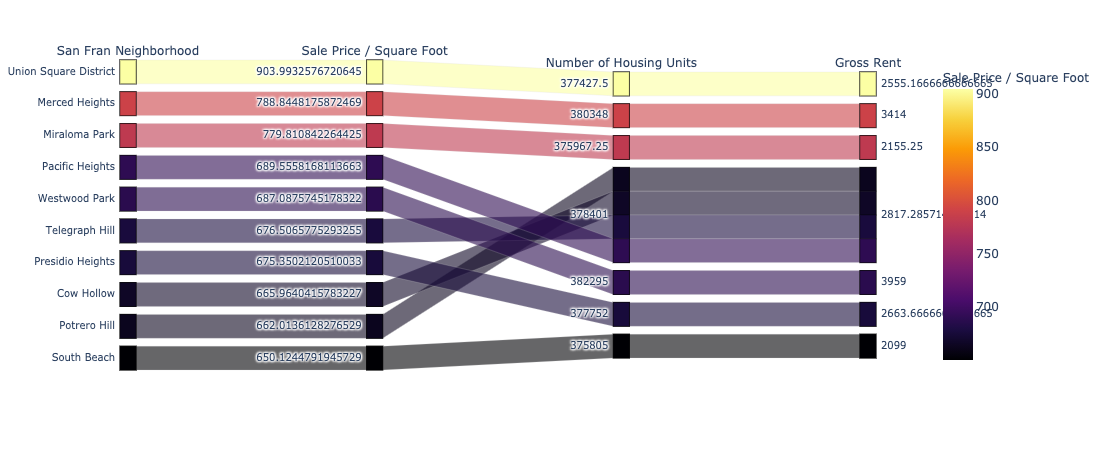

In [417]:
# Parallel Categories Plot

px.parallel_categories(price_by_neighborhood.nlargest(10,'sale_price_sqr_foot'),
    dimensions=["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        #'year' : 'Year',
        'neighborhood' : 'San Fran Neighborhood',
        "sale_price_sqr_foot": "Sale Price / Square Foot",
        "housing_units": "Number of Housing Units",
        "gross_rent": "Gross Rent",
    },
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [418]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path,index_col='Neighborhood')
df_neighborhood_locations.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [419]:
# Calculate the mean values for each neighborhood
sales_by_nhood = sfo_data.groupby(['neighborhood']).mean()
sales_by_nhood.index.name = 'Neighborhood'
sales_by_nhood.head()

sale_price_sqr_foot  housing_units   gross_rent
Neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [420]:
# Join the average values with the neighborhood locations
neighborhood_sales_location_df = pd.concat([sales_by_nhood,df_neighborhood_locations], axis="columns", join="inner")
neighborhood_sales_location_df.head()

sale_price_sqr_foot  housing_units   gross_rent        Lat  \
Neighborhood                                                                   
Alamo Square               366.020712       378401.0  2817.285714  37.791012   
Anza Vista                 373.382198       379050.0  3031.833333  37.779598   
Bayview                    204.588623       376454.0  2318.400000  37.734670   
Bayview Heights            590.792839       382295.0  3739.000000  37.728740   
Buena Vista Park           452.680591       378076.5  2698.833333  37.768160   

                         Lon  
Neighborhood                  
Alamo Square     -122.402100  
Anza Vista       -122.443451  
Bayview          -122.401060  
Bayview Heights  -122.410980  
Buena Vista Park -122.439330

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

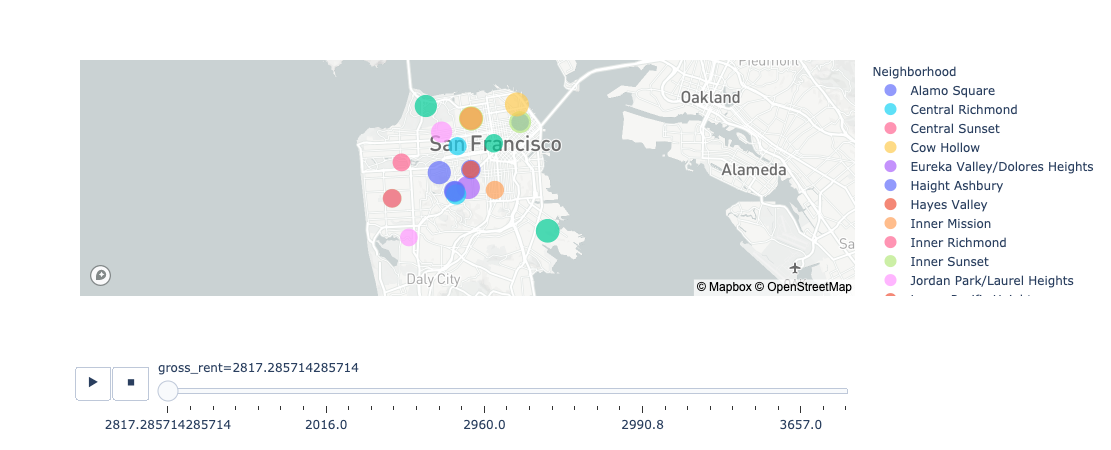

In [422]:
# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(mapbox_token)
map_plot = px.scatter_mapbox(
    neighborhood_sales_location_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color=neighborhood_sales_location_df.index,
    animation_frame='gross_rent',
    zoom=10,
)

# Display the map
map_plot.show()